In [1]:
%matplotlib inline
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Aggregate Transfrom

In [3]:
cars = data.cars.url

In [4]:
cars

'https://vega.github.io/vega-datasets/data/cars.json'

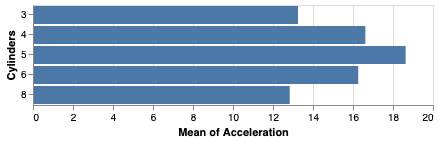

In [6]:
alt.Chart(cars).mark_bar().encode(
    y='Cylinders:O',
    x='mean(Acceleration):Q'
)

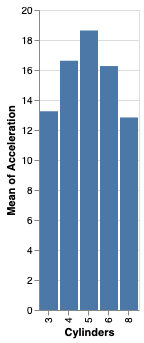

In [7]:
alt.Chart(cars).mark_bar().encode(
    x='Cylinders:O',
    y='mean(Acceleration):Q'
)

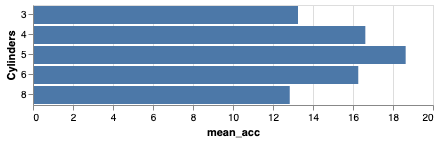

In [9]:
alt.Chart(cars).mark_bar().encode(
    y='Cylinders:O',
    x='mean_acc:Q'
).transform_aggregate(
    mean_acc = 'mean(Acceleration)',
    groupby=['Cylinders']
)


# Bin Transforms

In [10]:
movies = data.movies.url

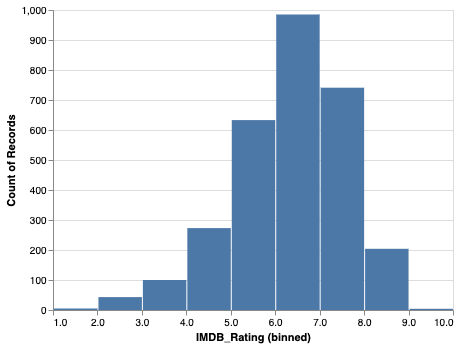

In [12]:
alt.Chart(movies).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()'
)

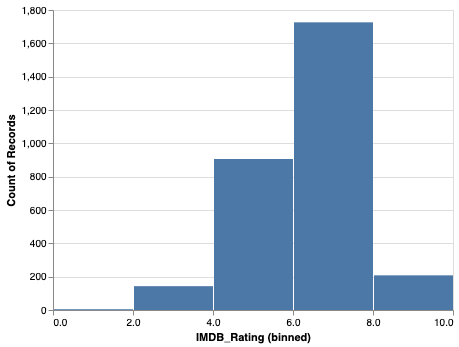

In [15]:
alt.Chart(movies).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=alt.Bin(maxbins=5)),
    y='count()'
)

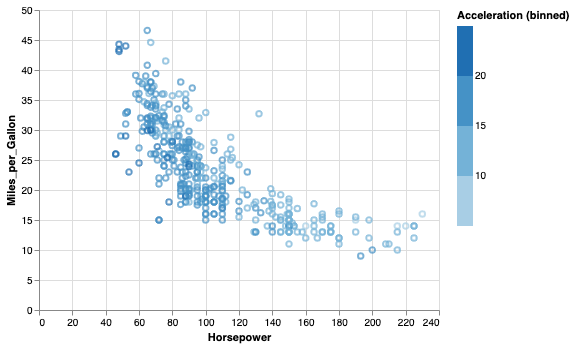

In [13]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.Color('Acceleration:Q', bin=alt.Bin(maxbins=5))
)

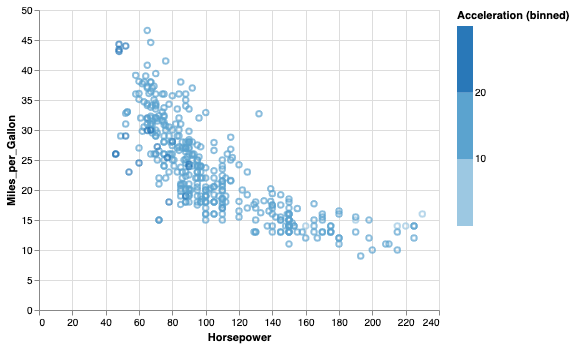

In [14]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.Color('Acceleration:Q', bin=alt.Bin(maxbins=3))
)

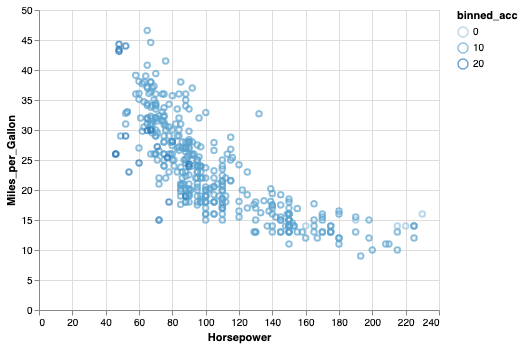

In [16]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='binned_acc:O'
).transform_bin(
    'binned_acc', 'Acceleration', bin=alt.Bin(maxbins=3) 
)

#alt.Color('Acceleration:Q', bin=alt.Bin(maxbins=3))

# Filters

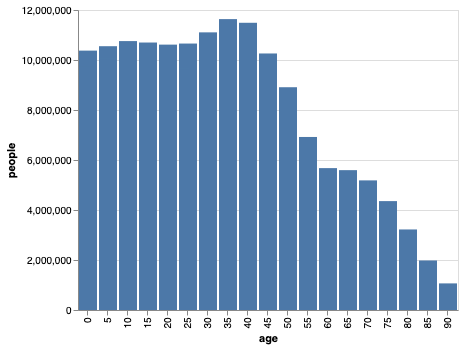

In [17]:
pop = data.population.url

alt.Chart(pop).mark_bar().encode(
    x='age:O',
    y='people:Q'
)

In [18]:
from altair import datum

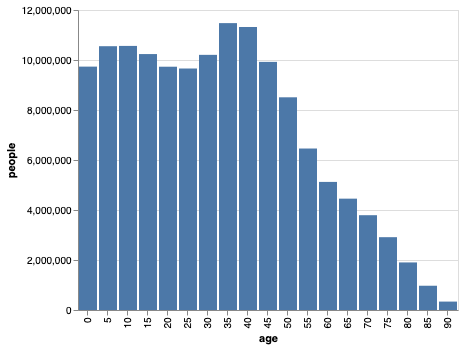

In [19]:
alt.Chart(pop).mark_bar().encode(
    x='age:O',
    y='people:Q'
).transform_filter(
    (datum.year == 2000) & (datum.sex == 1)
)